Importing Necessary Dependencies.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(1)

**Problem 2**

*Importing Fata Giles and Creating Response and Predictor Sets*

In [92]:
TwinCities_data = pd.read_csv("TwinCityHomes.csv")
TwinCities_data
features = ["BEDS", "BATHS", "SQFT", "LotSize", "Age", "ParkingSpots"]
X = TwinCities_data[features]
X = X.to_numpy()
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X = (X - X_max) / (X_max - X_min)
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = TwinCities_data["ListPrice"].to_numpy().reshape(-1, 1)

predict = np.array([4, 2.5, 2080, 5600, 2, 19])
predict = (predict - X_max) / (X_max - X_min)
predict = np.hstack((np.array([1]), predict))

*Defining Loss Function and Loss Function Gradient Functions*

In [ ]:
def LossFunction(w, X, y):
  return ((1 / (2 * X.shape[0])) * ((X@w - y).T)@(X@w - y))[0, 0]

def LossFunctionGradient(w, X, y):
  return (1 / X.shape[0]) * (X.T)@(X@w - y)

def SLossFunction(w, Xi, yi):
  return ((1 / 2) * ((Xi@w - yi).T)@(Xi@w - yi))[0, 0]

def SLossFunctionGradient(w, Xi, yi):
  return (Xi.T)@(Xi@w - yi)

*Defining Gradient Descent Method and Stochastic Gradient Descent Method Functions*

In [168]:
def GradientMethod(w, X, y, step_size=0.02, stop_cond=0.001, max_iterations=1000000):
  loss_values = []
  index = []
  for x in range(max_iterations):
    index.append(x + 1)
    grad = LossFunctionGradient(w, X, y)
    norm_loss = np.linalg.norm(grad)
    loss_values.append(LossFunction(w, X, y))
    if norm_loss < stop_cond:
      w = w - step_size * grad
      plt.plot(index, loss_values)
      plt.xlabel("Iteration")
      plt.ylabel("Loss Value")
      plt.title("Normal Gradient Method Loss Value vs Iteration")
      plt.show()
      return w
    w = w - step_size * grad
  plt.plot(index, loss_values)
  plt.xlabel("Iteration")
  plt.ylabel("Loss Value")
  plt.title("Normal Gradient Method Loss Value vs Iteration")
  plt.show()
  return w

def SGradientMethod(w, X, y, step_size=0.02, stop_cond=0.001, max_epoch=10000):
  loss_values = []
  index = []
  indices = np.arange(X.shape[0])
  norm_loss = 1
  for x in range(max_epoch):
    index.append(x + 1)
    np.random.shuffle(indices)
    epoch_loss_average = []
    for i in indices:
      grad = SLossFunctionGradient(w, X[i:i+1, :], y[i:i+1])
      norm_loss = np.linalg.norm(grad)
      epoch_loss_average.append(LossFunction(w, X, y))
      if norm_loss < stop_cond:
        break
      w = w - step_size * grad
    loss_values.append(np.mean(epoch_loss_average))
    if norm_loss < stop_cond:
      plt.plot(index, loss_values)
      plt.xlabel("Epoch")
      plt.ylabel("Loss Value")
      plt.title("Stochastic Gradient Method Loss Value vs Epoch")
      plt.show()
      return w
  plt.plot(index, loss_values)
  plt.xlabel("Epoch")
  plt.ylabel("Loss Value")
  plt.title("Stochastic Gradient Method Loss Value vs Epoch")
  plt.show()
  return w

def MBSGradientMethod(w, X, y, batch_size=3, step_size=0.02, stop_cond=0.001, max_epoch=10000):
  loss_values = []
  index = []
  indices = np.arange(X.shape[0])
  total_iter = int(X.shape[0] / batch_size)
  norm_loss = 1
  grad = np.ones((X.shape[1], 1))
  for x in range(max_epoch):
    np.random.shuffle(indices)
    index.append(x + 1)
    epoch_loss_average = []
    for i in range(total_iter):
      grad = np.ones((X.shape[1], 1))
      for j in indices[i * batch_size: (i + 1) * batch_size]:
        grad += SLossFunctionGradient(w, X[j:j+1, :], y[j:j+1])
      grad /= batch_size
      norm_loss = np.linalg.norm(grad)
      epoch_loss_average.append(LossFunction(w, X, y))
      if norm_loss < stop_cond:
        break
      w = w - step_size * grad
    loss_values.append(np.mean(epoch_loss_average))
    if norm_loss < stop_cond:
      plt.plot(index, loss_values)
      plt.xlabel("Epoch")
      plt.ylabel("Loss Value")
      plt.title("Mini-Batch Stochastic Gradient Method Loss Value vs Epoch")
      plt.show()
      return w
  plt.plot(index, loss_values)
  plt.xlabel("Epoch")
  plt.ylabel("Loss Value")
  plt.title("Mini-Batch Stochastic Gradient Method Loss Value vs Epoch")
  plt.show()
  return w
  

*Generating Optimal w Value and Predicting*

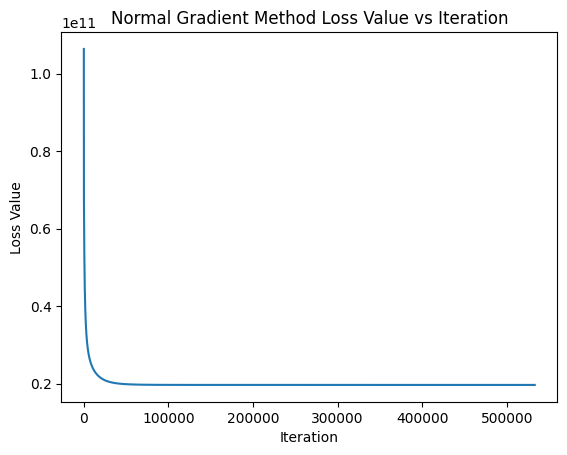

[[2548659.7788721 ]
 [-610923.58103601]
 [ 260188.79525464]
 [2718486.73648207]
 [ 345650.03557348]
 [ -46765.62875868]
 [-101528.07706804]]
(7, 1)
[217399.23403619]
RSS:              6605502.039281753
R^2:              0.46853419309107325
CV_RMSE (*100%):  0.028410129160247766


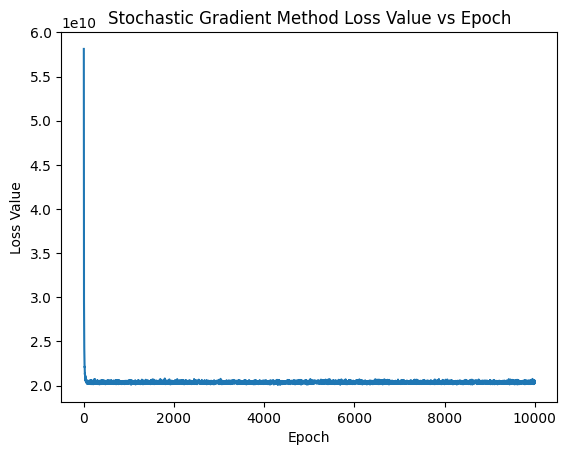

[[2548991.92208913]
 [-611624.92368117]
 [ 252036.5319062 ]
 [2718880.23474354]
 [ 339024.13699265]
 [ -40667.71747814]
 [-106464.32201001]]
(7, 1)
[220626.0408578]
RSS:              6624551.861114021
R^2:              0.4670014815921818
CV_RMSE (*100%):  0.028451066113669734


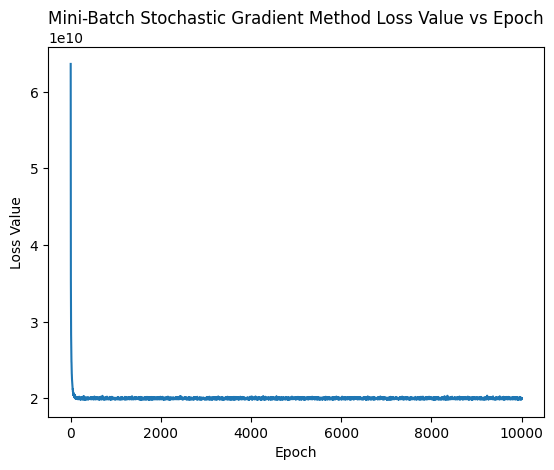

[[2549173.64731434]
 [-606537.16876896]
 [ 267228.17873549]
 [2725213.81695313]
 [ 346716.97404104]
 [ -47167.2947229 ]
 [ -99566.66254636]]
(7, 1)
[205985.02971515]
RSS:              6628202.427220044
R^2:              0.4667077641654558
CV_RMSE (*100%):  0.028458904243325686


In [169]:
def prediction(X, w):
  return X@w

w_opt = GradientMethod(np.ones((X.shape[1], 1)), X, y)
for i in range(len(w_opt)):
  print(f"w_{i} = {w_opt[i, 0]}")
print(prediction(predict, w_opt))

SS_Residual=np.sum(np.linalg.norm(X@w_opt - y))
R_squared=1 - (SS_Residual/np.sum(np.linalg.norm(y - np.mean(y))))
CV_RMSE = np.sqrt(SS_Residual/X.shape[0]) / np.mean(y)

print("RSS:             ", SS_Residual)
print("R^2:             ", R_squared)
print("CV_RMSE (*100%): ", CV_RMSE * 100)

w_opt = SGradientMethod(np.ones((X.shape[1], 1)), X, y)
for i in range(len(w_opt)):
  print(f"w_{i} = {w_opt[i, 0]}")
print(prediction(predict, w_opt))

SS_Residual=np.sum(np.linalg.norm(X@w_opt - y))
R_squared=1 - (SS_Residual/np.sum(np.linalg.norm(y - np.mean(y))))
CV_RMSE = np.sqrt(SS_Residual/X.shape[0]) / np.mean(y)

print("RSS:             ", SS_Residual)
print("R^2:             ", R_squared)
print("CV_RMSE (*100%): ", CV_RMSE * 100)

w_opt = MBSGradientMethod(np.ones((X.shape[1], 1)), X, y, 2)
print("Mini-batch ")
for i in range(len(w_opt)):
  print(f"w_{i} = {w_opt[i, 0]}")
print(prediction(predict, w_opt))

SS_Residual=np.sum(np.linalg.norm(X@w_opt - y))
R_squared=1 - (SS_Residual/np.sum(np.linalg.norm(y - np.mean(y))))
CV_RMSE = np.sqrt(SS_Residual/X.shape[0]) / np.mean(y)

print("RSS:             ", SS_Residual)
print("R^2:             ", R_squared)
print("CV_RMSE (*100%): ", CV_RMSE * 100)

*Short Analysis:*
The R^2 values for all values are quite low (explaining less half the variance seen in the data). Furthermore, intuitively, the credibility of these predictions are put under scrutiny considering as they utilize weights that imply that the price of a house decreases by the number of beds and parking spots. However, given the low Coefficient of Variation of Root Mean Squared Error, these linear models all perform fairly well in predicting the prices of houses. Given the best R^2 and CV_RMSE values fall with the first model, the first model has the best predictive capability when pricing houses (however not by a big margin). IT IS ALSO IMPORTANT TO NOTE that these favorable metrics may be largely due to the fact that we are testing the model on the data we trained it on.

**Problem 2**

*Importing Fata Giles and Creating Response and Predictor Sets*

In [163]:
Iris_Data = np.loadtxt('iris_binary.txt', delimiter=" ")
np.random.shuffle(Iris_Data)

train_set, test_set = (Iris_Data[:int(Iris_Data.shape[0] * 0.8)], Iris_Data[int(Iris_Data.shape[0] * 0.8):])
X_train, X_test = (train_set[:, 0:4], test_set[:, 0:4])
y_train, y_test = (train_set[:, 4], test_set[:, 4])

*Defining Loss Function and Loss Function Gradient Functions*

In [164]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def LLossFunction(w, X, y):
    return np.sum([math.log(1 + np.exp((X[i:i+1, :]@w)[0, 0])) - (y[i] * (X[i:i+1, :]@w)[0, 0]) for i in range(len(y))], axis=0)

def LLossFunctionGradient(w, X, y):
    return np.sum([(sigmoid((X[i:i+1, :]@w)[0, 0]) - y[i]) * X[i:i+1, :].T for i in range(len(y))], axis=0)

def SLLossFunction(w, Xi, yi):
    return math.log(1 + np.exp((Xi@w)[0, 0])) - (yi * (Xi@w)[0, 0]) 

def SLLossFunctionGradient(w, Xi, yi):
    return ((sigmoid((Xi@w)[0, 0])) - yi) * Xi.T

*Defining Stochastic Gradient Descent Method*

In [165]:
def SLGradientMethod(w, X, y, step_size=0.001, stop_cond=0.001, max_iterations=1000000):
  loss_values = []
  index = []
  norm_loss = 1
  for x in range(max_iterations):
    index.append(x + 1)
    i = np.random.randint(0, X.shape[0])
    grad = SLLossFunctionGradient(w, X[i:i+1, :], y[i:i+1])
    norm_loss = np.linalg.norm(grad)
    loss_values.append(LLossFunction(w, X, y))
    if norm_loss < stop_cond:
      plt.plot(index, loss_values)
      plt.xlabel("Iteration")
      plt.ylabel("Loss Value")
      plt.title("Stochastic Gradient Method Loss Value vs Iteration")
      plt.show()
      return w
    w = w - step_size * grad
  plt.plot(index, loss_values)
  plt.xlabel("Iteration")
  plt.ylabel("Loss Value")
  plt.title("Stochastic Gradient Method Loss Value vs Iteration")
  plt.show()
  return w

*Generating Optimal w Value and Predicting*

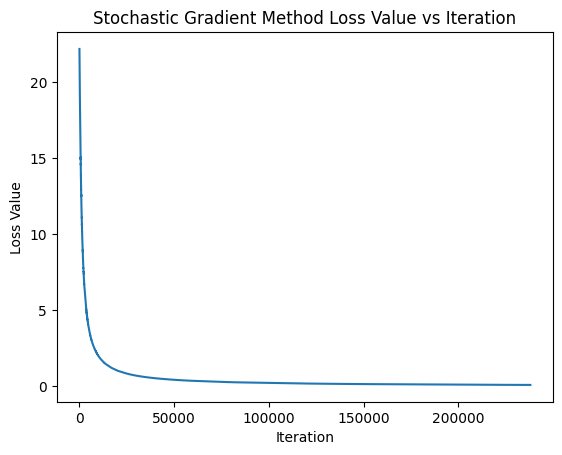

[[-0.66910875]
 [-2.38444168]
 [ 3.51770906]
 [ 1.60838512]]
(4, 1)
Accuracy (*100%): 62.5


In [166]:
w_opt = SLGradientMethod(np.zeros((X_train.shape[1], 1)), X_train, y_train)
print(w_opt)
print(w_opt.shape)

probabilities = sigmoid(X_test@w_opt)
predictions = (probabilities >= 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print("Accuracy (*100%):", accuracy * 100)

*Short Analysis:*
Given by the fact that the accuracy is around 50-65% over multiple iterations of different training and test splits, that the model has some classification capability. However, when you take into consideration the fact that the data is split 50-50 between Iris-Setosa and Iris-Versicolor, it doesn't do that much better than just guessing at random (or guessing one variation or the other for all rows in the test set).